# 1: Visualization Exercise
Here, three alternative visualizations of the same artificial data are created. All plots display fictitious genomic annotations together with fictitious RNA binding protein data. The visualizations shall display RNA binding protein signals and link these binding information to genomic annotations to shed light on potential biological function. Two different datasets are used:

- 10_project_data_annotations.csv
- 10_project_data_signals.csv

The 10_project_data_annotations.csv file contains fictitious genomic information as visualized in all bottom panels of the example plots. Each horizontal line represents a transcript. A transcript can contain multiple exons (grey rectangles). Transcripts can be located on the '+' or on the '-' strand of the DNA.

10_project_data_signals.csv contains fictitious signals of four RNA binding proteins (P1, P2, P3, P4).

In [6]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpp
import os

In [10]:
#Preprocessing the data to be used
data = pd.read_csv('10_project_data_signals.csv')
anno = pd.read_csv('10_project_data_annotation.csv')

P1 = data['P1']
P2 = data['P2']
P3 = data['P3']
P4 = data['P4']

start = anno['start']
stop = anno['stop']

#Creating an extra column to convert + and - strands to 0 and 1
conditions = [
    anno['strand'] == '-',
    anno['strand'] == '+'
]

outputs = [1,0]

res = np.select(conditions, outputs, 'Other')
anno['strand_b'] = pd.Series(res)

#Extracting only exon data from the annotation dataframe
exons = anno.loc[anno['type'] == 'exon']

#Extracting only transcript data from the annotation dataframe
trans = anno.loc[anno['type']=='transcript']

## Version 1

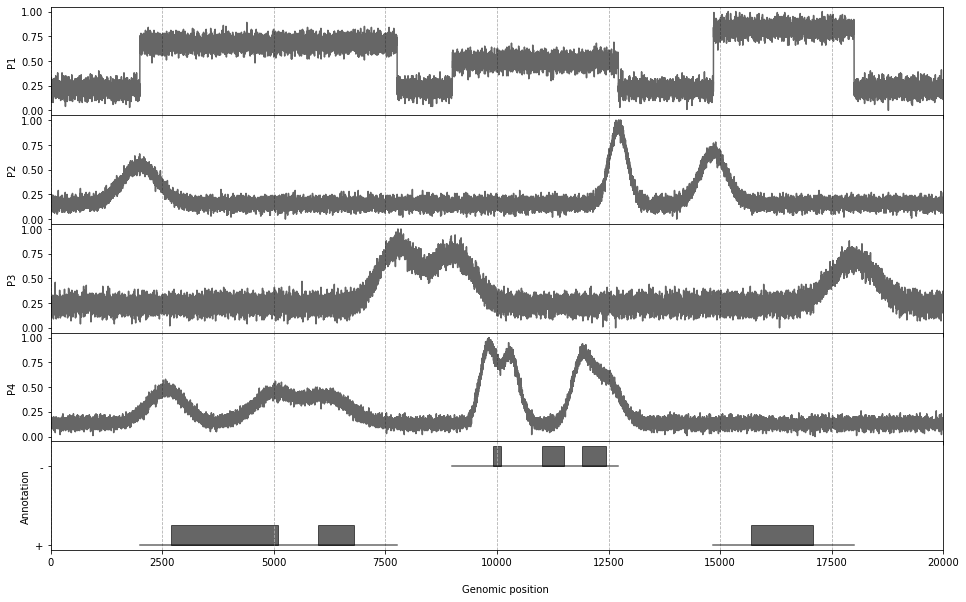

In [11]:
#Creating 5 subplots
fig, axs = plt.subplots(5, sharex = 'col')
fig.set_size_inches(16,10) #Setting up the size of the whole plot
fig.subplots_adjust(hspace=0) #to specify that there should be no space between the subplots
fig.text(0.52, 0.07, 'Genomic position', ha='center', va='center') #x-axis label for whole plot 

#Setting up common values for plots
c = 'black'
a = 0.6
h = 0.25

#Plotting the data for each column
axs[0].plot(P1, c=c, alpha=a)
axs[0].set_ylabel('P1')
axs[0].grid(axis='x', linestyle='dashed')
axs[0].set_xlim(0,20000) #removes whitespace around plots

axs[1].plot(P2, c=c, alpha=a)
axs[1].grid(axis='x', linestyle='dashed')
axs[1].set_ylabel('P2')

axs[2].plot(P3, c=c, alpha=a)
axs[2].grid(axis='x', linestyle='dashed')
axs[2].set_ylabel('P3')

axs[3].plot(P4, c=c, alpha=a)
axs[3].grid(axis='x', linestyle='dashed')
axs[3].set_ylabel('P4')

#Creating annotation plot

'''Creating the rectangles representing each exon and plotting them'''

r1 = mpp.Rectangle(xy=(int(exons.iloc[0,2]),int(exons.iloc[0,5])), width=int(exons.iloc[0,3]-exons.iloc[0,2]), height=h,  color=c, alpha=a)
r2 = mpp.Rectangle(xy=(int(exons.iloc[1,2]),int(exons.iloc[1,5])), width=int(exons.iloc[1,3]-exons.iloc[1,2]), height=h,  color=c, alpha=a)
r3 = mpp.Rectangle(xy=(int(exons.iloc[2,2]),int(exons.iloc[2,5])), width=int(exons.iloc[2,3]-exons.iloc[2,2]), height=h,  color=c, alpha=a)
r4 = mpp.Rectangle(xy=(int(exons.iloc[3,2]),int(exons.iloc[3,5])), width=int(exons.iloc[3,3]-exons.iloc[3,2]), height=h,  color=c, alpha=a)
r5 = mpp.Rectangle(xy=(int(exons.iloc[4,2]),int(exons.iloc[4,5])), width=int(exons.iloc[4,3]-exons.iloc[4,2]), height=h,  color=c, alpha=a)
r6 = mpp.Rectangle(xy=(int(exons.iloc[5,2]),int(exons.iloc[5,5])), width=int(exons.iloc[5,3]-exons.iloc[5,2]), height=h,  color=c, alpha=a)

genes = [r1,r2,r3,r4,r5,r6]

axs[4].scatter(start, anno['strand'], color='white')
for gene in genes: 
    axs[4].add_patch(gene) #Plotting the rectangles/exons as created above

'''Plotting one line per transcript'''

axs[4].plot((trans.iloc[0,2],trans.iloc[0,3]),(trans.iloc[0,4],trans.iloc[0,4]), c=c, alpha=a) #drawing arbitrary lines using plt.plot((x1,x2),(y1,y2)) such that x1 = start position, x2 = stop position and y1, y2 = strand
axs[4].plot((trans.iloc[1,2],trans.iloc[1,3]),(trans.iloc[1,4],trans.iloc[1,4]), c=c, alpha=a)
axs[4].plot((trans.iloc[2,2],trans.iloc[2,3]),(trans.iloc[2,4],trans.iloc[2,4]), c=c, alpha=a)

'''Changing the y-axis as required'''
axs[4].set_ylabel('Annotation')
axs[4].grid(axis='x', linestyle='dashed')

## Version 2

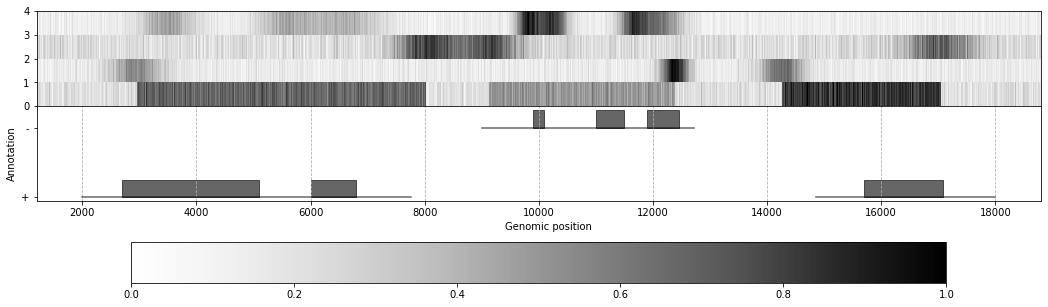

In [12]:
#Setting up total plot
fig, axs = plt.subplots(2)
fig.set_size_inches(18,5)
fig.subplots_adjust(hspace=0)
fig.text(0.52, 0.28, 'Genomic position', ha='center', va='center')
axs[0].set_xlim(0,20000)

#Plotting the colormap
mat = axs[0].pcolormesh(data.T, cmap='Greys') #data.T transforms the data so it can be plotted with columns on the y axis
fig.colorbar(mat, ax=axs, orientation='horizontal')
axs[0].axes.get_xaxis().set_visible(False)
axs[0].grid(axis='x', linestyle='dashed',color=c)

#Plotting annotation as above
r1 = mpp.Rectangle(xy=(int(exons.iloc[0,2]),int(exons.iloc[0,-1])), width=int(exons.iloc[0,3]-exons.iloc[0,2]), height=h,  color=c, alpha=a)
r2 = mpp.Rectangle(xy=(int(exons.iloc[1,2]),int(exons.iloc[1,-1])), width=int(exons.iloc[1,3]-exons.iloc[1,2]), height=h,  color=c, alpha=a)
r3 = mpp.Rectangle(xy=(int(exons.iloc[2,2]),int(exons.iloc[2,-1])), width=int(exons.iloc[2,3]-exons.iloc[2,2]), height=h,  color=c, alpha=a)
r4 = mpp.Rectangle(xy=(int(exons.iloc[3,2]),int(exons.iloc[3,-1])), width=int(exons.iloc[3,3]-exons.iloc[3,2]), height=h,  color=c, alpha=a)
r5 = mpp.Rectangle(xy=(int(exons.iloc[4,2]),int(exons.iloc[4,-1])), width=int(exons.iloc[4,3]-exons.iloc[4,2]), height=h,  color=c, alpha=a)
r6 = mpp.Rectangle(xy=(int(exons.iloc[5,2]),int(exons.iloc[5,-1])), width=int(exons.iloc[5,3]-exons.iloc[5,2]), height=h,  color=c, alpha=a)

genes = [r1,r2,r3,r4,r5,r6]

axs[1].scatter(start, anno['strand'], color='white')

for gene in genes: 
    axs[1].add_patch(gene)

'''Plotting one line per transcript'''

axs[1].plot((trans.iloc[0,2],trans.iloc[0,3]),(trans.iloc[0,4],trans.iloc[0,4]), c=c, alpha=a)
axs[1].plot((trans.iloc[1,2],trans.iloc[1,3]),(trans.iloc[1,4],trans.iloc[1,4]), c=c, alpha=a)
axs[1].plot((trans.iloc[2,2],trans.iloc[2,3]),(trans.iloc[2,4],trans.iloc[2,4]), c=c, alpha=a)

'''Changing the y-axis as required'''
axs[1].set_ylabel('Annotation')
axs[1].grid(axis='x', linestyle='dashed')

## Version 3

Text(0, 0.5, 'Annotation')

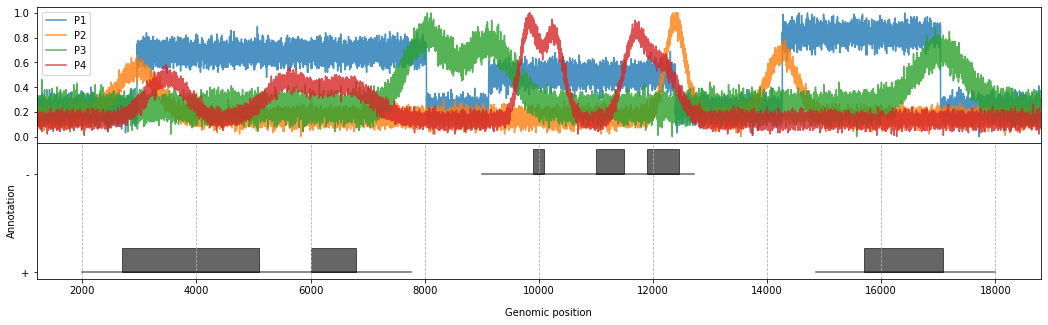

In [13]:
#Setting up overall plot
fig, axs = plt.subplots(2)
fig.set_size_inches(18,5)
fig.subplots_adjust(hspace=0)
fig.text(0.52, 0.03, 'Genomic position', ha='center', va='center')
axs[0].set_xlim(0,20000)

#Plotting each line on the same axis
axs[0].plot(P1, label='P1', alpha=0.8)
axs[0].plot(P2, label='P2', alpha=0.8)
axs[0].plot(P3, label='P3', alpha=0.8)
axs[0].plot(P4, label='P4', alpha=0.8)
    
axs[0].legend(loc="upper left")
axs[0].grid(axis='x', linestyle='dashed')
axs[0].axes.get_xaxis().set_visible(False) #Hiding x axis

#Annotation plot as above
r1 = mpp.Rectangle(xy=(int(exons.iloc[0,2]),int(exons.iloc[0,-1])), width=int(exons.iloc[0,3]-exons.iloc[0,2]), height=h,  color=c, alpha=a)
r2 = mpp.Rectangle(xy=(int(exons.iloc[1,2]),int(exons.iloc[1,-1])), width=int(exons.iloc[1,3]-exons.iloc[1,2]), height=h,  color=c, alpha=a)
r3 = mpp.Rectangle(xy=(int(exons.iloc[2,2]),int(exons.iloc[2,-1])), width=int(exons.iloc[2,3]-exons.iloc[2,2]), height=h,  color=c, alpha=a)
r4 = mpp.Rectangle(xy=(int(exons.iloc[3,2]),int(exons.iloc[3,-1])), width=int(exons.iloc[3,3]-exons.iloc[3,2]), height=h,  color=c, alpha=a)
r5 = mpp.Rectangle(xy=(int(exons.iloc[4,2]),int(exons.iloc[4,-1])), width=int(exons.iloc[4,3]-exons.iloc[4,2]), height=h,  color=c, alpha=a)
r6 = mpp.Rectangle(xy=(int(exons.iloc[5,2]),int(exons.iloc[5,-1])), width=int(exons.iloc[5,3]-exons.iloc[5,2]), height=h,  color=c, alpha=a)

genes = [r1,r2,r3,r4,r5,r6]
axs[1].scatter(start, anno['strand'], color='white')
for gene in genes: 
    axs[1].add_patch(gene)
    
axs[1].plot((trans.iloc[0,2],trans.iloc[0,3]),(trans.iloc[0,4],trans.iloc[0,4]), c=c, alpha=a)
axs[1].plot((trans.iloc[1,2],trans.iloc[1,3]),(trans.iloc[1,4],trans.iloc[1,4]), c=c, alpha=a)
axs[1].plot((trans.iloc[2,2],trans.iloc[2,3]),(trans.iloc[2,4],trans.iloc[2,4]), c=c, alpha=a)

axs[1].grid(axis='x', linestyle='dashed')
axs[1].set_ylabel('Annotation')

## Discussion
Pros and cons of the different visualisation methods

Version 1:

Pros:

Offers a significant amount of details.
Can be used to find specific data points, e.g., 'at genomic position 10000, P4 shows a dip within a peak'.
Cons:

Extended visualization is difficult to see at once for the viewer.
Separate subplots may offer too much information at once
Version 2:

Pros:

Compacted view offers similar trend-line information as version 1.
Easier for the viewer to compare the 4 samples.
Cons:

Much less detail offered than version 1
Easy to miss subtleties if this is the only plot used to derive insights.
Version 3:

Pros:

Offers the benefits of both previous versions: trends are visualized without being overly expansive or compact
Cons:

Information in this plot may be somewhat cluttered and difficult to read, as the data from different samples are overlaid on one another.
A comment on the use of these visualizations: Genome browsers offer many styles of visualization, because each individual one will have drawbacks. Being able to view each visualization as required is crucial to get all the necessary data. In the case of scientific publications, compact/summarized data is handy when explaining results, but expansive visualizations may be much more helpful in the appendix, for future researchers to rely on.